# $\alpha$-Rational Inattention

## Optimal Consideration Sets




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from blahut_arimoto import BA
from alpha_blahut_arimoto import alpha_BA


In [2]:
sns.set_style('whitegrid')
colors = sns.color_palette("ch:3,r=.2,l=.6")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# import os

# cwdir = %pwd
# fig_dir = os.path.abspath(os.path.join(cwdir, '../figures'))

In [3]:
def alpha_MI(P, mu, a, k):
    """
    alpha-mutual information costs of experiment P.
    Handles Shannon case.
    """
    if a == 1:
        K = k*np.sum((mu[:, np.newaxis] * P) * np.log(P/(mu@P)))
    else:
        K = k*a/(a - 1)*np.log(np.sum(np.sum(P**a * mu[:, np.newaxis], axis=0)**(1/a)))
    return K

In [4]:
def alpha_netU(U, P, mu, a, k):
    """Net utility under alpha-mutual information costs."""
    return  np.sum((U * P * mu[:, np.newaxis])) - alpha_MI(P, mu, a, k)

In [5]:
def uncond_prob_netU(priors, U, k, a):
    """"
    Return unconditional choice prob and net achieved utility
    under optimal attention strategy for vector of priors.
    """
    muPs = []
    netU = []

    for prior in priors:
        if prior < 1:
            mu = np.array([prior, 1-prior])
            # Shannon
            if a == 1:
                RI = BA(U, k, mu)
                q_Sh, P_Sh = RI.opt_strat(tol=1e-12)
                muPs.append(q_Sh[0])
                netU.append(alpha_netU(U, P_Sh, mu, a, k))
            # alpha-RI
            else:
                RI_al = alpha_BA(U, k, mu, a)
                _, _, P_a = RI_al.opt_strat(tol=1e-12)
                muPs.append((mu @ P_a)[0])
                netU.append(alpha_netU(U, P_a, mu, a, k))
        elif prior == 1:
            muPs.append(1)
            netU.append(1)
    
    return muPs, netU

In [6]:
# Payoff-matrix -- stateXactions
U = np.array([[1, 0], [0, 1]])

# Multiplier on cost of information
k = 1

In [7]:
priors = np.append(np.sort(1 - np.geomspace(0.05, .5, 50)), 1)

muPs_Sh, netU_Sh = uncond_prob_netU(priors, U, k, 1)
muPs_al, netU_al = uncond_prob_netU(priors, U, k, .75)
muPs_ah, netU_ah = uncond_prob_netU(priors, U, k, 1.5)

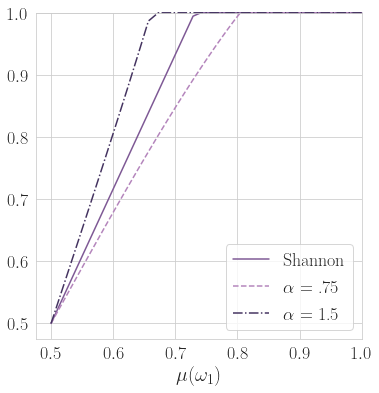

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(priors, muPs_Sh, label="Shannon", 
        color=colors[2], linestyle='-', clip_on=False)
ax.plot(priors, muPs_al, label=r"$\alpha$ = .75", 
        color=colors[0], linestyle='--', clip_on=False)
ax.plot(priors, muPs_ah, label=r"$\alpha$ = 1.5", 
        color=colors[4], linestyle='-.', clip_on=False)
ax.set_aspect('equal')
ax.set_ylim(top=1)
ax.set_xlim(right=1)
ax.legend()
ax.set(xlabel=r'$\mu(\omega_1)$')

# plt.savefig(os.path.join(fig_dir, 'consideration_prob.pdf'), format='pdf', dpi=1200, bbox_inches='tight')
plt.show()

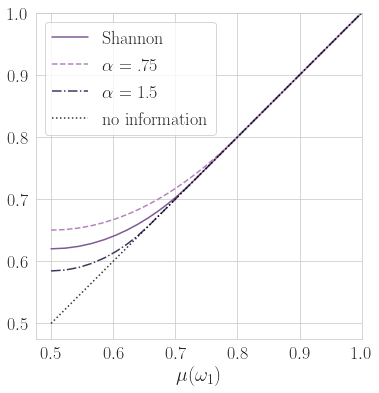

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(priors, netU_Sh, label="Shannon", 
        color=colors[2], linestyle='-')
ax.plot(priors, netU_al, label=r"$\alpha$ = .75", 
        color=colors[0],linestyle='--')
ax.plot(priors, netU_ah, label=r"$\alpha$ = 1.5", 
        color=colors[4], linestyle='-.')
ax.plot(priors, priors, label="no information", 
        color='k', linestyle=':', alpha=.8)
ax.set_aspect('equal')
ax.set_ylim(top=1)
ax.set_xlim(right=1)
ax.legend()
ax.set_xlabel(r'$\mu(\omega_1)$')

# plt.savefig(os.path.join(fig_dir, 'consideration_netU.pdf'), format='pdf', dpi=1200, bbox_inches='tight')
plt.show()